# Substitution Ciphers

In [182]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import string
import pickle

## Introduction

This report focuses on substitution ciphers, one of the simplest and oldest forms of encryption in cryptography, though considered vulnerable by modern standards. This simplicity comes from the fact that each letter is mapped to another letter by a pre-defined "rule," and due to the size of the English alphabet and modern computation power, this rule can be exposed by the attacker with a simple set of operations.

Substitution ciphers are essentially ciphers that substitute each letter in a message with a different one from a shifted or shuffled alphabet, based on a key or a rule. Specifically, our goal is to implement, analyze, and decrypt 3 types of substitution ciphers called the Caeser Cipher, the Simple Substitution Cipher and the Affine Cipher through the brute force and frequency analysis methods.  

For the Caesar Cipher, we aim to find a key through the brute force technique, and for the Simple Substitution Cipher, the goal is to reconstruct the plaintext by matching the frequency of the letters in the English alphabet and the ciphertext, known as the frequency analysis technique, while in Affire Cipher the method is to use both multiplication and addition in modular arithmetic.

## Caesar Cipher

Gaius Julius Caesar was a Roman general and statesman. The Caesar Cipher, a simple encryption technique, was named after him, as he reportedly used this method in his private correspondence with his army (Singh, 1999).

The Caesar Cipher is a type of substitution cipher in which each letter in the plaintext is shifted forward (or backward) by a fixed number of positions in the alphabet. The key determines how many positions each letter is moved. For example, if the key is 2 in the English alphabet, each letter in the text shifts by two positions, mapping the letter 'A' to 'C' . Since the English alphabet has only 26 possible keys, a brute-force attack remains a feasible method for decryption (Katz & Lindell, 2020).

The decryption process mirrors the encryption process by reversing the shift and restoring the letters to their original positions. Following the previous example, the letter 'C' would shift back to 'A' after decryption . The following task demonstrates both encryption and decryption using the Caesar Cipher.(Menezes, van Oorschot, & Vanstone, 1996)

### Encryption

In [183]:
# encryption function for caesar cipher
def caesar_encrypt(plaintext, shift=0):
    ''' Encrypt `plaintext` (str) as a caesar cipher with a given `shift` (int) 
    '''
    alphabet = string.ascii_lowercase
    ciphertext = ''
    for char in plaintext:
            if char in alphabet:
                ciphertext += alphabet[(alphabet.index(char) + shift) % 26]
            else:
                ciphertext += char  # non-alphabetic characters remain unchanged
    return ciphertext

In [184]:
# code snippet to test the implementation of the encryption function
plaintext = 'hello!' 
ciphertext = caesar_encrypt(plaintext, shift=4)

print(plaintext, '->', ciphertext) # expected output 'hello! -> lipps!'


hello! -> lipps!


### Decryption

In [185]:
# decryption function for caesar cipher
def caesar_decrypt(ciphertext, shift=0):
    ''' Decrypt `ciphertext` (str) as a caesar cipher with a given `shift` (int) 
    '''
    # code here
    alphabet = string.ascii_lowercase
    plaintext = ''
    for char in ciphertext:
            if char in alphabet:
                plaintext += alphabet[(alphabet.index(char) - shift) % 26]
            else:
                plaintext += char  # non-alphabetic characters remain unchanged
                
    return plaintext

In [186]:
# code snippet to test the implementation of the decryption function
ciphertext = 'lipps!' # 'hello!' encoded with shift=4
plaintext = caesar_decrypt(ciphertext, shift=4)

print(ciphertext, '->', plaintext)  # expected output 'lipps! -> hello!'

lipps! -> hello!


### Ciphertext

In [187]:
# Load ciphertext
with open('ciphertext_caesar.txt', 'r', encoding='utf-8') as file:
    ciphertext = file.read()

In [188]:
# Printing a part of the ciphertext
ciphertext[:100]

'jgew (alsdasf sfv dslaf: jges, hjgfgmfuwv [ˈjgːes] ) ak lzw ushalsd ualq gx alsdq. al ak sdkg lzw us'

### Brute Force Attack

One of the major vulnerabilities of the Caesar Cipher is the limited number of possible keys—only 25 distinct shifts—making it highly susceptible to brute-force attacks. A brute-force attack involves systematically trying all possible shift values and analyzing the resulting plaintexts to identify the correct one (Katz & Lindell, 2020).

In [189]:
# code here the procedure that allows you to infer the shift value
for shift in range(26):
    plaintext = caesar_decrypt(ciphertext, shift)
    print(f'Shift={shift}: {plaintext[:100]} \n')

Shift=0: jgew (alsdasf sfv dslaf: jges, hjgfgmfuwv [ˈjgːes] ) ak lzw ushalsd ualq gx alsdq. al ak sdkg lzw us 

Shift=1: ifdv (zkrczre reu crkze: ifdr, gifefletvu [ˈifːdr] ) zj kyv trgzkrc tzkp fw zkrcp. zk zj rcjf kyv tr 

Shift=2: hecu (yjqbyqd qdt bqjyd: hecq, fhedekdsut [ˈheːcq] ) yi jxu sqfyjqb syjo ev yjqbo. yj yi qbie jxu sq 

Shift=3: gdbt (xipaxpc pcs apixc: gdbp, egdcdjcrts [ˈgdːbp] ) xh iwt rpexipa rxin du xipan. xi xh pahd iwt rp 

Shift=4: fcas (whozwob obr zohwb: fcao, dfcbcibqsr [ˈfcːao] ) wg hvs qodwhoz qwhm ct whozm. wh wg ozgc hvs qo 

Shift=5: ebzr (vgnyvna naq yngva: ebzn, cebabhaprq [ˈebːzn] ) vf gur pncvgny pvgl bs vgnyl. vg vf nyfb gur pn 

Shift=6: dayq (ufmxumz mzp xmfuz: daym, bdazagzoqp [ˈdaːym] ) ue ftq ombufmx oufk ar ufmxk. uf ue mxea ftq om 

Shift=7: czxp (telwtly lyo wlety: czxl, aczyzfynpo [ˈczːxl] ) td esp nlatelw ntej zq telwj. te td lwdz esp nl 

Shift=8: bywo (sdkvskx kxn vkdsx: bywk, zbyxyexmon [ˈbyːwk] ) sc dro mkzsdkv msdi yp sdkvi. sd sc kvcy d

In [190]:
# select the right shift and print the decrypted ciphertext
print(f'Correct shift is 18.\nDecrypted message is: {caesar_decrypt(ciphertext, 18)}')

Correct shift is 18.
Decrypted message is: rome (italian and latin: roma, pronounced [ˈroːma] ) is the capital city of italy. it is also the capital of the lazio region, the centre of the metropolitan city of rome capital, and a special comune (municipality) named comune di roma capitale. with 2,860,009 residents in 1,285 km2 (496.1 sq mi), rome is the country's most populated comune and the third most populous city in the european union by population within city limits. the metropolitan city of rome, with a population of 4,355,725 residents, is the most populous metropolitan city in italy. its metropolitan area is the third-most populous within italy. rome is located in the central-western portion of the italian peninsula, within lazio (latium), along the shores of the tiber valley. vatican city (the smallest country in the world and headquarters of the worldwide catholic church under the governance of the holy see) is an independent country inside the city boundaries of rome, the onl

## Simple Substitution Cipher

A Simple Substitution Cipher differs from the Caesar Cipher in that each letter in the plaintext is replaced with a unique letter from the alphabet. Because this mapping is random, rather than following a fixed shift as in the Caesar Cipher, there are 26! ∼ 10²⁶ ∼ 2⁸⁸ possible permutations. This makes brute-force decryption infeasible, as trying all combinations would take thousands of years, even with modern computational power. Therefore, an alternative technique, known as the frequency analysis method, is used to break the cipher (Stallings, 2017).

### Encryption

In [191]:
# encryption function for simple substitution cipher
def substitution_encrypt(plaintext, mapping):
    ''' Encrypt `ciphertext` (str) as a simple substitution cipher with a given 
        `mapping` (??) from plaintext letters to ciphertext letters '''
    # code here
    ciphertext = ''
    for char in plaintext:
        if char in mapping:
            ciphertext += mapping[char]
        else:
            ciphertext += char
    return ciphertext

In [192]:
# code snippet to test the implementation of the encryption function
plaintext = 'hello!'
mapping = {'h': 'a', 'e': 'p', 'l': 'w', 'o': 'q'} 

ciphertext = substitution_encrypt(plaintext, mapping)

print(plaintext, '->', ciphertext) # expected output 'hello! -> apwwq!'

hello! -> apwwq!


### Decryption

In [193]:
# decryption function for simple substitution cipher, mapping is reversed for this process
def substitution_decrypt(ciphertext, mapping):
   ''' Decrypt `ciphertext` (str) as a simple substitution cipher with a given 
       `mapping` (dict) from plaintext letters to ciphertext letters '''

   reverse_mapping = {v: k for k, v in mapping.items()}
   return substitution_encrypt(ciphertext, reverse_mapping)

In [194]:
# code snippet to test the implementation of the decryption function
mapping = {'h': 'a', 'e': 'p', 'l': 'w', 'o': 'q'}  # previous mapping 
ciphertext = 'apwwq!'

plaintext = substitution_decrypt(ciphertext, mapping)

print(ciphertext, '->', plaintext)  # expected output 'apwwq! -> hello!'

apwwq! -> hello!


### Ciphertext

In [195]:
# Load ciphertext
with open('ciphertext_simple.txt', 'r', encoding='utf-8') as file:
    ciphertext = file.read()
    
# print the first 100 characters of the ciphertext
ciphertext[:100]

'vf pseygdtsbyce, b lxolgvgxgvdf pvycms vl b kmgcdj dr mfpseygvft vf ucvpc xfvgl dr ywbvfgmng bsm smy'

### Frequency Analysis Attack

While brute-force attacks are unfeasible, the English language retains its statistical properties even when encrypted using a substitution cipher. This means that English follows a predictable pattern of letter frequency distribution, where certain letters (such as 'e,' 't,' and 'a') and specific words appear more frequently than others. If the ciphertext is long enough to be statistically significant, a mapping can be established between the most frequently occurring characters in English and those in the ciphertext, enabling decryption through frequency analysis (Singh, 1999).

#### English Letters Distribution

In [196]:
# function to infer the letter distribution from a text
def letter_distribution(text):
    ''' Return the `distribution` (??) of the letters in `text` (str) '''
    # code here
    sum_letters = sum([char.isalpha() for char in text])

    distribution = {}
    for char in string.ascii_lowercase:
        if char in text:
            distribution[char] = text.count(char)/sum_letters
    return distribution   

In [197]:
# code snippet to test the implementation of `letter_distribution`
text = 'hello world!'

letter_distribution(text)
# expected ouput: 
# {'d': 0.1, 'e': 0.1, 'h': 0.1, 'l': 0.3, 'o': 0.2, 'r': 0.1, 'w': 0.1, ...}

{'d': 0.1, 'e': 0.1, 'h': 0.1, 'l': 0.3, 'o': 0.2, 'r': 0.1, 'w': 0.1}

In [198]:
# load text
with open('wikipedia_cybersecurity.txt', 'r', encoding='utf-8') as file:
    wiki_text = file.read()
    
wiki_text[:100]

'Computer security (also cybersecurity, digital security, or information technology (IT) security) is'

In [199]:
# estimate the English letters distribution
english_distribution = letter_distribution(wiki_text)

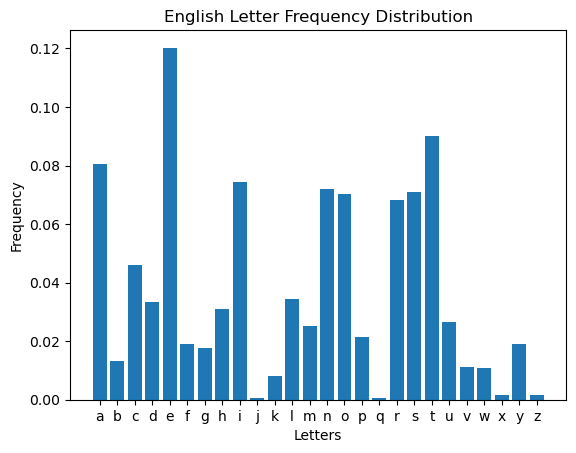

In [200]:
# plot the English letter distribution
plt.bar(english_distribution.keys(), english_distribution.values())
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('English Letter Frequency Distribution')
plt.show()

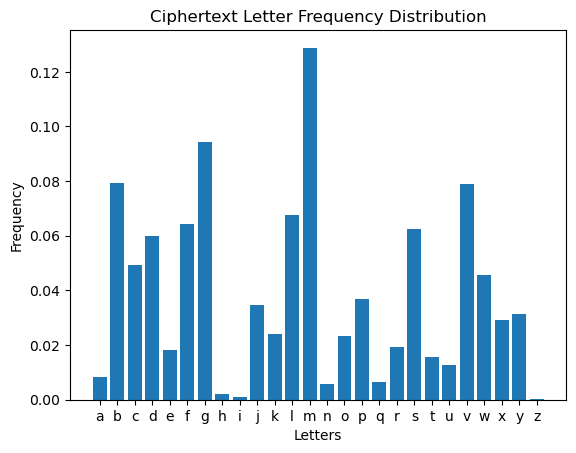

In [201]:
# plot the ciphertext letter distribution
plt.bar(letter_distribution(ciphertext).keys(), letter_distribution(ciphertext).values())
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Ciphertext Letter Frequency Distribution')
plt.show()

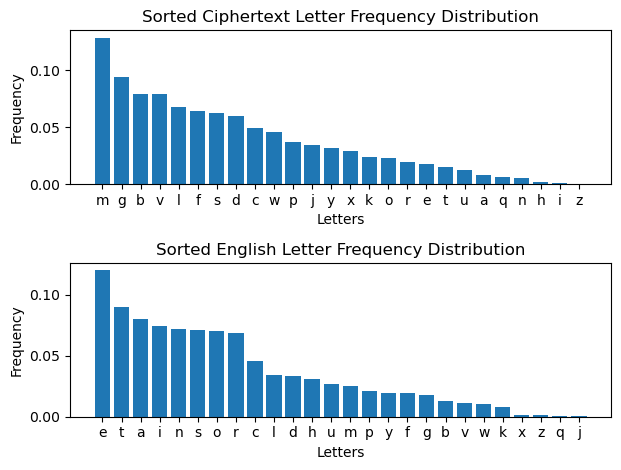

In [202]:
# sort the distributions for better visualization
sorted_ciphertext_distribution = dict(sorted(letter_distribution(ciphertext).items(), key=lambda item: item[1], reverse=True))
sorted_english_distribution = dict(sorted(english_distribution.items(), key=lambda item: item[1], reverse=True))

# Create subplots
fig, axs = plt.subplots(2, 1)

# plot sorted ciphertext letter distribution
axs[0].bar(sorted_ciphertext_distribution.keys(), sorted_ciphertext_distribution.values())
axs[0].set_xlabel('Letters')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Sorted Ciphertext Letter Frequency Distribution')

# plot sorted English letter distribution
axs[1].bar(sorted_english_distribution.keys(), sorted_english_distribution.values())
axs[1].set_xlabel('Letters')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Sorted English Letter Frequency Distribution')

plt.tight_layout()
plt.show()

In [203]:
# store the distribution as a pickle file, check to see if it works
with open('letter_distribution.pkl', 'wb') as pickle_file:
    pickle.dump(english_distribution, pickle_file)

print("Letter distribution saved as 'letter_distribution.pkl'")


Letter distribution saved as 'letter_distribution.pkl'


In [204]:
with open(file='letter_distribution.pkl', mode='rb') as f:
    english_distribution = pickle.load(f)

#### Perform attack

In [205]:
# perform Frequency analysis attack 
print(ciphertext[:100])

vf pseygdtsbyce, b lxolgvgxgvdf pvycms vl b kmgcdj dr mfpseygvft vf ucvpc xfvgl dr ywbvfgmng bsm smy


In [206]:
# function here gives you one letter, two letter, and three letter words in your text to help you infer the mapping
def one_two_three_letter_words(ciphertext):
    words = ciphertext.replace('\n', ' ').replace('\t', ' ').split(' ')
    one_letter_words = [word for word in words if len(word) == 1 and word.isalpha()]
    two_letter_words = [word for word in words if len(word) == 2 and word.isalpha()]
    three_letter_words = [word for word in words if len(word) == 3 and word.isalpha()]

    set_one_letter_words = {word: one_letter_words.count(word) for word in set(one_letter_words)}
    set_one_letter_words = dict(sorted(set_one_letter_words.items(), key=lambda item: item[1], reverse=True))
    set_two_letter_words = {word: two_letter_words.count(word) for word in set(two_letter_words)}
    set_two_letter_words = dict(sorted(set_two_letter_words.items(), key=lambda item: item[1], reverse=True))
    set_three_letter_words = {word: three_letter_words.count(word) for word in set(three_letter_words)}
    set_three_letter_words = dict(sorted(set_three_letter_words.items(), key=lambda item: item[1], reverse=True))
    print("Set of one-letter words:", set_one_letter_words)
    print("Set of two-letter words:", set_two_letter_words)
    print("Set of three-letter words:", set_three_letter_words)

In [207]:
# try to find the frequent words
one_two_three_letter_words(ciphertext)

Set of one-letter words: {'b': 115, 'f': 5, 'n': 5, 'v': 4, 'o': 1, 'i': 1, 'h': 1}
Set of two-letter words: {'dr': 138, 'vf': 110, 'vl': 74, 'gd': 61, 'oe': 50, 'om': 32, 'bl': 32, 'vg': 17, 'ds': 14, 'ld': 11, 'bg': 11, 'vr': 9, 'df': 9, 'bf': 7, 'xl': 5, 'fd': 5, 'jm': 5, 'cm': 2, 'bw': 2, 'um': 2, 'tl': 1, 'vv': 1, 'wm': 1, 'uj': 1, 'xy': 1, 'ab': 1, 'ih': 1, 'bj': 1}
Set of three-letter words: {'gcm': 297, 'bfj': 74, 'bsm': 38, 'ubl': 36, 'rds': 29, 'pbf': 15, 'dfm': 14, 'bww': 11, 'fdg': 10, 'qme': 9, 'dxg': 7, 'ubs': 7, 'ybj': 6, 'oxg': 6, 'cbj': 5, 'mfj': 4, 'xlm': 4, 'lmg': 3, 'cvl': 3, 'vgl': 3, 'ube': 3, 'bfe': 3, 'kbe': 3, 'sdu': 2, 'gud': 2, 'lmm': 2, 'fdu': 2, 'jvm': 2, 'kby': 1, 'ucd': 1, 'jvj': 1, 'cdg': 1, 'nva': 1, 'rbs': 1, 'rmu': 1, 'vof': 1, 'tyj': 1, 'lvs': 1, 'lvl': 1, 'cdu': 1, 'ngc': 1, 'cms': 1, 'sxf': 1, 'kbg': 1, 'idb': 1, 'jxm': 1, 'obf': 1, 'wdu': 1, 'cbl': 1}


In [208]:
english_letters = list(sorted_english_distribution.keys())
cipher_letters = list(sorted_ciphertext_distribution.keys())

# initialize mapping for the most frequent 5 letters
partial_mapping = {english_letters[i]: cipher_letters[i] for i in range(5)}
print(partial_mapping)

{'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 'n': 'l'}


In [209]:
# decrypt the ciphertext using the partial mapping and try to infer the most common words
partially_decrypted_ciphertext = substitution_decrypt(ciphertext, partial_mapping)
print(partial_mapping, '\n')
one_two_three_letter_words(partially_decrypted_ciphertext)

{'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 'n': 'l'} 

Set of one-letter words: {'a': 115, 'f': 5, 'i': 5, 'n': 5, 'o': 1, 'h': 1}
Set of two-letter words: {'dr': 138, 'if': 110, 'oe': 82, 'in': 74, 'td': 61, 'an': 32, 'it': 17, 'ds': 14, 'nd': 11, 'at': 11, 'ir': 9, 'df': 9, 'af': 7, 'je': 5, 'xn': 5, 'fd': 5, 'ue': 2, 'ce': 2, 'aw': 2, 'tn': 1, 'we': 1, 'uj': 1, 'aa': 1, 'xy': 1, 'ih': 1, 'aj': 1, 'ii': 1}
Set of three-letter words: {'tce': 297, 'afj': 74, 'ase': 38, 'uan': 36, 'rds': 29, 'paf': 15, 'dfe': 14, 'aww': 11, 'fdt': 10, 'qee': 9, 'uas': 7, 'dxt': 7, 'yaj': 6, 'oxt': 6, 'caj': 5, 'efj': 4, 'xne': 4, 'net': 3, 'uae': 3, 'itn': 3, 'kae': 3, 'afe': 3, 'cin': 3, 'sdu': 2, 'tud': 2, 'nee': 2, 'jie': 2, 'fdu': 2, 'ces': 1, 'can': 1, 'ida': 1, 'kat': 1, 'iof': 1, 'oaf': 1, 'ucd': 1, 'cdt': 1, 'ras': 1, 'tyj': 1, 'kay': 1, 'ntc': 1, 'reu': 1, 'cdu': 1, 'sxf': 1, 'jxe': 1, 'jij': 1, 'nia': 1, 'nis': 1, 'wdu': 1, 'nin': 1}


In [210]:
# because 'dr' does not contain letter a or i, it is likely that 'dr' is 'of'
partial_mapping['o'] = 'd'
partial_mapping['f'] = 'r'
partially_decrypted_ciphertext = substitution_decrypt(ciphertext, partial_mapping)

print(ciphertext[:100])
print(partial_mapping, '\n')
one_two_three_letter_words(partially_decrypted_ciphertext)

vf pseygdtsbyce, b lxolgvgxgvdf pvycms vl b kmgcdj dr mfpseygvft vf ucvpc xfvgl dr ywbvfgmng bsm smy
{'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 'n': 'l', 'o': 'd', 'f': 'r'} 

Set of one-letter words: {'a': 115, 'f': 5, 'i': 5, 'n': 5, 'o': 1, 'h': 1}
Set of two-letter words: {'of': 147, 'if': 119, 'oe': 82, 'in': 74, 'to': 61, 'an': 32, 'it': 17, 'os': 14, 'at': 11, 'no': 11, 'af': 7, 'fo': 5, 'je': 5, 'xn': 5, 'ue': 2, 'ce': 2, 'aw': 2, 'tn': 1, 'we': 1, 'uj': 1, 'aa': 1, 'xy': 1, 'ih': 1, 'aj': 1, 'ii': 1}
Set of three-letter words: {'tce': 297, 'afj': 74, 'ase': 38, 'uan': 36, 'fos': 29, 'paf': 15, 'ofe': 14, 'oxt': 13, 'aww': 11, 'fot': 10, 'qee': 9, 'uas': 7, 'yaj': 6, 'caj': 5, 'efj': 4, 'xne': 4, 'net': 3, 'uae': 3, 'itn': 3, 'kae': 3, 'afe': 3, 'cin': 3, 'nee': 2, 'sou': 2, 'jie': 2, 'tuo': 2, 'fou': 2, 'ces': 1, 'can': 1, 'kat': 1, 'cot': 1, 'iof': 1, 'oaf': 1, 'wou': 1, 'tyj': 1, 'kay': 1, 'ntc': 1, 'fas': 1, 'sxf': 1, 'jxe': 1, 'feu': 1, 'cou': 1, 'jij': 1, 'nia': 1, 'nis': 1

In [211]:
# 'tce' is likely 'the'
partial_mapping['h'] = 'c'
partially_decrypted_ciphertext = substitution_decrypt(ciphertext, partial_mapping)
print(partially_decrypted_ciphertext[:200])
print(partial_mapping, '\n')

one_two_three_letter_words(partially_decrypted_ciphertext)

if pseytotsayhe, a nxontitxtiof piyhes in a kethoj of efpseytift if uhiph xfitn of ywaiftent ase seywapej uith the piyhestent, if a jefifej kaffes, uith the hewy of a qee; the "xfitn" kae oe niftwe we
{'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 'n': 'l', 'o': 'd', 'f': 'r', 'h': 'c'} 

Set of one-letter words: {'a': 115, 'f': 5, 'i': 5, 'n': 5, 'o': 1, 'h': 1}
Set of two-letter words: {'of': 147, 'if': 119, 'oe': 82, 'in': 74, 'to': 61, 'an': 32, 'it': 17, 'os': 14, 'at': 11, 'no': 11, 'af': 7, 'fo': 5, 'je': 5, 'xn': 5, 'ue': 2, 'he': 2, 'aw': 2, 'tn': 1, 'we': 1, 'uj': 1, 'aa': 1, 'xy': 1, 'ih': 1, 'aj': 1, 'ii': 1}
Set of three-letter words: {'the': 297, 'afj': 74, 'ase': 38, 'uan': 36, 'fos': 29, 'paf': 15, 'ofe': 14, 'oxt': 13, 'aww': 11, 'fot': 10, 'qee': 9, 'uas': 7, 'yaj': 6, 'haj': 5, 'efj': 4, 'xne': 4, 'net': 3, 'hin': 3, 'uae': 3, 'itn': 3, 'kae': 3, 'afe': 3, 'nee': 2, 'sou': 2, 'jie': 2, 'tuo': 2, 'fou': 2, 'kat': 1, 'oaf': 1, 'iof': 1, 'wou': 1, 'hou': 1, 'hot': 1, 'tyj': 1

In [212]:
# 'afj' is likely 'and'
partial_mapping['n'] = 'f'
partial_mapping['d'] = 'j'
partially_decrypted_ciphertext = substitution_decrypt(ciphertext, partial_mapping)
print(partially_decrypted_ciphertext[:200])
print(partial_mapping, '\n')

one_two_three_letter_words(partially_decrypted_ciphertext)

in pseytotsayhe, a lxoltitxtion piyhes il a kethod of enpseytint in uhiph xnitl of ywaintent ase seywaped uith the piyhestent, in a defined kannes, uith the hewy of a qee; the "xnitl" kae oe lintwe we
{'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 'n': 'f', 'o': 'd', 'f': 'r', 'h': 'c', 'd': 'j'} 

Set of one-letter words: {'a': 115, 'n': 10, 'i': 5, 'o': 1, 'h': 1}
Set of two-letter words: {'of': 138, 'in': 110, 'oe': 82, 'il': 74, 'to': 61, 'al': 32, 'it': 17, 'os': 14, 'at': 11, 'lo': 11, 'on': 9, 'if': 9, 'an': 7, 'no': 5, 'de': 5, 'xl': 5, 'ue': 2, 'he': 2, 'aw': 2, 'ad': 1, 'tl': 1, 'we': 1, 'aa': 1, 'xy': 1, 'ud': 1, 'ih': 1, 'ii': 1}
Set of three-letter words: {'the': 297, 'and': 74, 'ase': 38, 'ual': 36, 'fos': 29, 'pan': 15, 'one': 14, 'oxt': 13, 'aww': 11, 'not': 10, 'qee': 9, 'uas': 7, 'yad': 6, 'had': 5, 'xle': 4, 'end': 4, 'ane': 3, 'let': 3, 'uae': 3, 'itl': 3, 'kae': 3, 'hil': 3, 'die': 2, 'nou': 2, 'lee': 2, 'sou': 2, 'tuo': 2, 'ion': 1, 'hal': 1, 'kat': 1, 'wou': 1, 'hou': 

In [213]:
# 'ase' is likely 'are'
partial_mapping['r'] = 's'
partially_decrypted_ciphertext = substitution_decrypt(ciphertext, partial_mapping)
print(partially_decrypted_ciphertext[:200])
print(partial_mapping, '\n')
one_two_three_letter_words(partially_decrypted_ciphertext)

in preytotrayhe, a lxoltitxtion piyher il a kethod of enpreytint in uhiph xnitl of ywaintent are reywaped uith the piyhertent, in a defined kanner, uith the hewy of a qee; the "xnitl" kae oe lintwe we
{'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 'n': 'f', 'o': 'd', 'f': 'r', 'h': 'c', 'd': 'j', 'r': 's'} 

Set of one-letter words: {'a': 115, 'n': 10, 'i': 5, 'o': 1, 'h': 1}
Set of two-letter words: {'of': 138, 'in': 110, 'oe': 82, 'il': 74, 'to': 61, 'al': 32, 'it': 17, 'or': 14, 'at': 11, 'lo': 11, 'on': 9, 'if': 9, 'an': 7, 'no': 5, 'de': 5, 'xl': 5, 'ue': 2, 'he': 2, 'aw': 2, 'ad': 1, 'tl': 1, 'we': 1, 'aa': 1, 'xy': 1, 'ud': 1, 'ih': 1, 'ii': 1}
Set of three-letter words: {'the': 297, 'and': 74, 'are': 38, 'ual': 36, 'for': 29, 'pan': 15, 'one': 14, 'oxt': 13, 'aww': 11, 'not': 10, 'qee': 9, 'uar': 7, 'yad': 6, 'had': 5, 'xle': 4, 'end': 4, 'ane': 3, 'let': 3, 'uae': 3, 'itl': 3, 'kae': 3, 'hil': 3, 'die': 2, 'nou': 2, 'lee': 2, 'rou': 2, 'tuo': 2, 'ion': 1, 'hal': 1, 'kat': 1, 'rxn': 

In [214]:
# 'il' is likely 'is'
partial_mapping['s'] = 'l'
partially_decrypted_ciphertext = substitution_decrypt(ciphertext, partial_mapping)
print(partially_decrypted_ciphertext[:200])
print(partial_mapping, '\n')
one_two_three_letter_words(partially_decrypted_ciphertext)

in preytotrayhe, a sxostitxtion piyher is a kethod of enpreytint in uhiph xnits of ywaintent are reywaped uith the piyhertent, in a defined kanner, uith the hewy of a qee; the "xnits" kae oe sintwe we
{'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 'n': 'f', 'o': 'd', 'f': 'r', 'h': 'c', 'd': 'j', 'r': 's', 's': 'l'} 

Set of one-letter words: {'a': 115, 'n': 10, 'i': 5, 'o': 1, 'h': 1}
Set of two-letter words: {'of': 138, 'in': 110, 'oe': 82, 'is': 74, 'to': 61, 'as': 32, 'it': 17, 'or': 14, 'so': 11, 'at': 11, 'on': 9, 'if': 9, 'an': 7, 'xs': 5, 'no': 5, 'de': 5, 'ue': 2, 'he': 2, 'aw': 2, 'ad': 1, 'we': 1, 'aa': 1, 'xy': 1, 'ud': 1, 'ih': 1, 'ts': 1, 'ii': 1}
Set of three-letter words: {'the': 297, 'and': 74, 'are': 38, 'uas': 36, 'for': 29, 'pan': 15, 'one': 14, 'oxt': 13, 'aww': 11, 'not': 10, 'qee': 9, 'uar': 7, 'yad': 6, 'had': 5, 'xse': 4, 'end': 4, 'ane': 3, 'his': 3, 'set': 3, 'uae': 3, 'kae': 3, 'its': 3, 'die': 2, 'nou': 2, 'rou': 2, 'tuo': 2, 'see': 2, 'ion': 1, 'kat': 1, 'has': 

In [215]:
# 'pan' is likely 'can'
partial_mapping['c'] = 'p'
partially_decrypted_ciphertext = substitution_decrypt(ciphertext, partial_mapping)
print(partially_decrypted_ciphertext[:200])
print(partial_mapping, '\n')
one_two_three_letter_words(partially_decrypted_ciphertext)

in creytotrayhe, a sxostitxtion ciyher is a kethod of encreytint in uhich xnits of ywaintent are reywaced uith the ciyhertent, in a defined kanner, uith the hewy of a qee; the "xnits" kae oe sintwe we
{'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 'n': 'f', 'o': 'd', 'f': 'r', 'h': 'c', 'd': 'j', 'r': 's', 's': 'l', 'c': 'p'} 

Set of one-letter words: {'a': 115, 'n': 10, 'i': 5, 'o': 1, 'h': 1}
Set of two-letter words: {'of': 138, 'in': 110, 'oe': 82, 'is': 74, 'to': 61, 'as': 32, 'it': 17, 'or': 14, 'so': 11, 'at': 11, 'on': 9, 'if': 9, 'an': 7, 'xs': 5, 'no': 5, 'de': 5, 'ue': 2, 'he': 2, 'aw': 2, 'ad': 1, 'we': 1, 'aa': 1, 'xy': 1, 'ud': 1, 'ih': 1, 'ts': 1, 'ii': 1}
Set of three-letter words: {'the': 297, 'and': 74, 'are': 38, 'uas': 36, 'for': 29, 'can': 15, 'one': 14, 'oxt': 13, 'aww': 11, 'not': 10, 'qee': 9, 'uar': 7, 'yad': 6, 'had': 5, 'xse': 4, 'end': 4, 'ane': 3, 'his': 3, 'set': 3, 'uae': 3, 'kae': 3, 'its': 3, 'die': 2, 'nou': 2, 'rou': 2, 'tuo': 2, 'see': 2, 'ion': 1, 'kat': 

In [216]:
# plaintext is mostly revealed, let's try to infer the remaining letters
partial_mapping['y'] = 'e'
partial_mapping['p'] = 'y'
partial_mapping['u'] = 'x'
partial_mapping['b'] = 'o'
partial_mapping['m'] = 'k'
partial_mapping['g'] = 't'
partial_mapping['w'] = 'u'
partial_mapping['l'] = 'w'
partial_mapping['x'] = 'n'
partial_mapping['k'] = 'q'
partially_decrypted_ciphertext = substitution_decrypt(ciphertext, partial_mapping)
print(partially_decrypted_ciphertext[:200])
print(partial_mapping, '\n')
one_two_three_letter_words(partially_decrypted_ciphertext)

in cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the "units" may be single le
{'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 'n': 'f', 'o': 'd', 'f': 'r', 'h': 'c', 'd': 'j', 'r': 's', 's': 'l', 'c': 'p', 'y': 'e', 'p': 'y', 'u': 'x', 'b': 'o', 'm': 'k', 'g': 't', 'w': 'u', 'l': 'w', 'x': 'n', 'k': 'q'} 

Set of one-letter words: {'a': 115, 'x': 5, 'i': 5, 'n': 5, 'h': 1, 'b': 1}
Set of two-letter words: {'of': 138, 'in': 110, 'is': 74, 'to': 61, 'by': 50, 'as': 32, 'be': 32, 'it': 17, 'or': 14, 'so': 11, 'at': 11, 'on': 9, 'if': 9, 'an': 7, 'no': 5, 'de': 5, 'us': 5, 'al': 2, 'we': 2, 'he': 2, 'le': 1, 'up': 1, 'ad': 1, 'wd': 1, 'aa': 1, 'gs': 1, 'ih': 1, 'ii': 1}
Set of three-letter words: {'the': 297, 'and': 74, 'are': 38, 'was': 36, 'for': 29, 'can': 15, 'one': 14, 'all': 11, 'not': 10, 'key': 9, 'out': 7, 'war': 7, 'pad': 6, 'but': 6, 'had': 5, 'use': 4, 'end': 4, '

In [217]:
print(partially_decrypted_ciphertext[:800])

in cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the "units" may be single letters (the most common), pairs of letters, triplets of letters, mixtures of the aboae, and so forth. the receiaer deciphers the text by performing the inaerse substitution process to extract the original message.
substitution ciphers can be compared with transposition ciphers. in a transposition cipher, the units of the plaintext are rearranged in a different and usually huite complex order, but the units themselaes are left unchanged. by contrast, in a substitution cipher, the units of the plaintext are retained in the same sehuence in the ciphertext, but the units themselaes are altered.
the


In [218]:
partial_mapping['v'] = 'a'
partial_mapping['q'] = 'h'
partial_mapping['z'] = 'i'
partially_decrypted_ciphertext = substitution_decrypt(ciphertext, partial_mapping)
print(partially_decrypted_ciphertext[:1000])
print(partial_mapping, '\n')
one_two_three_letter_words(partially_decrypted_ciphertext)

in cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the "units" may be single letters (the most common), pairs of letters, triplets of letters, mixtures of the above, and so forth. the receiver deciphers the text by performing the inverse substitution process to extract the original message.
substitution ciphers can be compared with transposition ciphers. in a transposition cipher, the units of the plaintext are rearranged in a different and usually quite complex order, but the units themselves are left unchanged. by contrast, in a substitution cipher, the units of the plaintext are retained in the same sequence in the ciphertext, but the units themselves are altered.
there are a number of different types of substitution cipher. if the cipher operates on single letters, it is termed a simple substitution cipher; a cipher that operates on larger groups of letters is te

In [219]:
# remaining letters are 'j' and 'z'
partial_mapping['j'] = 'z'

In [220]:
# Print the mapping with keys in alphabetical order
mapping = {sorted(partial_mapping.keys())[i]: partial_mapping[sorted(partial_mapping.keys())[i]] for i in range(26)}
print(mapping)


{'a': 'b', 'b': 'o', 'c': 'p', 'd': 'j', 'e': 'm', 'f': 'r', 'g': 't', 'h': 'c', 'i': 'v', 'j': 'z', 'k': 'q', 'l': 'w', 'm': 'k', 'n': 'f', 'o': 'd', 'p': 'y', 'q': 'h', 'r': 's', 's': 'l', 't': 'g', 'u': 'x', 'v': 'a', 'w': 'u', 'x': 'n', 'y': 'e', 'z': 'i'}


In [221]:
# print the decrypted ciphertext
print(substitution_decrypt(ciphertext, mapping))

in cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the "units" may be single letters (the most common), pairs of letters, triplets of letters, mixtures of the above, and so forth. the receiver deciphers the text by performing the inverse substitution process to extract the original message.
substitution ciphers can be compared with transposition ciphers. in a transposition cipher, the units of the plaintext are rearranged in a different and usually quite complex order, but the units themselves are left unchanged. by contrast, in a substitution cipher, the units of the plaintext are retained in the same sequence in the ciphertext, but the units themselves are altered.
there are a number of different types of substitution cipher. if the cipher operates on single letters, it is termed a simple substitution cipher; a cipher that operates on larger groups of letters is te

## Affine cipher

The Affine Cipher is a type of substitution cipher used for encryption and decryption in cryptography. In this technique, each letter in the alphabet is mapped to its numeric equivalent, and a mathematical function is applied to transform plaintext into ciphertext. The encryption function follows a linear transformation: (ax + b) mod m, where a and b are keys, and m represents the length of the alphabet (26). The decryption function is similar, using the formula a⁻¹ * (y - b) mod m, where a⁻¹ is the modular inverse of a (Stallings, 2017).

### Encryption

In [33]:
from math import gcd

In [101]:
def affine_encrypt(plaintext, a, b):
    ''' Encrypt `plaintext` (str) as an affine cipher with given `a` and `b` 
    '''
    alphabet = string.ascii_lowercase
    ciphertext = ''
    for char in plaintext:
        if char in alphabet:
            ciphertext += alphabet[(a * alphabet.index(char) + b) % 26]
        else:
            ciphertext += char  # non-alphabetic    
    
    return ciphertext

In [39]:
plaintext = 'hello world!'
a, b = 3, 1

ciphertext = affine_encrypt(plaintext, a, b)
print(plaintext, '->', ciphertext) # expected output 'hello world! -> wniir praik!'

hello world! -> wniir praik!


### Decryption

In [103]:
def mod_inverse(a, m):
    ''' Return the modular inverse of `a` (int) modulo `m` (int) 
    '''
    if gcd(a, m) != 1:
        return None
    for i in range(1, m):
        if (a * i) % m == 1:
            return i   

In [104]:
def affine_decrypt(ciphertext, a, b):
    ''' Decrypt `ciphertext` (str) as an affine cipher with given `a` and `b` 
    '''
    inverse_a = mod_inverse(a, 26)
    if inverse_a is None:
        return "Error: a is not invertible"
    
    inverse_a = [i for i in range(26) if (a * i) % 26 == 1][0]
    alphabet = string.ascii_lowercase
    plaintext = ''
    
    for char in ciphertext:
        if char in alphabet:
            plaintext += alphabet[(inverse_a * (alphabet.index(char) - b)) % 26]
        else:
            plaintext += char
            
    return plaintext

In [105]:
ciphertext = 'wniir praik!'
a, b = 3, 1

plaintext = affine_decrypt(ciphertext, a, b)
print(ciphertext, '->', plaintext) # expected output 'wniir praik! -> hello world!'

wniir praik! -> hello world!


### Ciphertext

In [106]:
# Load ciphertext
with open('ciphertext_affine.txt', 'r', encoding='utf-8') as file:
    ciphertext = file.read()
    
ciphertext

'yir doofqr xfkire fb d yjkr no tnqndwkidaryfx bvabyfyvyfnq xfkire, pirer rdxi wryyre fq dq dwkidary fb tdkkru yn fyb qvtrefx rhvfsdwrqy, rqxejkyru vbfql d bftkwr tdyirtdyfxdw ovqxyfnq, dqu xnqsreyru adxz yn d wryyre. yir onetvwd vbru trdqb yidy rdxi wryyre rqxejkyb yn nqr nyire wryyre, dqu adxz dldfq, trdqfql yir xfkire fb rbbrqyfdwwj d bydqudeu bvabyfyvyfnq xfkire pfyi d evwr lnsreqfql pifxi wryyre lnrb yn pifxi. db bvxi, fy idb yir prdzqrbbrb no dww bvabyfyvyfnq xfkireb. rdxi wryyre fb rqxfkireru pfyi yir ovqxyfnq (dm + a) tnu 26, pirer a fb yir tdlqfyvur no yir bifoy.\n\n\n== urbxefkyfnq ==\nirer, yir wryyreb no dq dwkidary no bfgr t der ofeby tdkkru yn yir fqyrlreb fq yir edqlr 0 ... t  1. fy yirq vbrb tnuvwde defyitryfx yn yedqbonet yir fqyrlre yidy rdxi kwdfqyrmy wryyre xneerbknqub yn fqyn dqnyire fqyrlre yidy xneerbknqu yn d xfkireyrmy wryyre.\nyir rqxejkyfnq ovqxyfnq one d bfqlwr wryyre fb \n\n  \n    \n      \n        r\n        (\n        m\n        )\n        =\n        (\n

### Breaking Cipher

In [107]:
for a in range(26):
    for b in range(26):
        plaintext = affine_decrypt(ciphertext, a, b)
        if 'Error: a is not invertible' not in plaintext:
            print(f'a={a}, b={b}: {plaintext[:50]} \n')    

a=1, b=0: yir doofqr xfkire fb d yjkr no tnqndwkidaryfx bvab 

a=1, b=1: xhq cnnepq wejhqd ea c xijq mn smpmcvjhczqxew auza 

a=1, b=2: wgp bmmdop vdigpc dz b whip lm rlolbuigbypwdv ztyz 

a=1, b=3: vfo allcno uchfob cy a vgho kl qknkathfaxovcu ysxy 

a=1, b=4: uen zkkbmn tbgena bx z ufgn jk pjmjzsgezwnubt xrwx 

a=1, b=5: tdm yjjalm safdmz aw y tefm ij oiliyrfdyvmtas wqvw 

a=1, b=6: scl xiizkl rzecly zv x sdel hi nhkhxqecxulszr vpuv 

a=1, b=7: rbk whhyjk qydbkx yu w rcdk gh mgjgwpdbwtkryq uotu 

a=1, b=8: qaj vggxij pxcajw xt v qbcj fg lfifvocavsjqxp tnst 

a=1, b=9: pzi uffwhi owbziv ws u pabi ef keheunbzuripwo smrs 

a=1, b=10: oyh teevgh nvayhu vr t ozah de jdgdtmaytqhovn rlqr 

a=1, b=11: nxg sddufg muzxgt uq s nyzg cd icfcslzxspgnum qkpq 

a=1, b=12: mwf rcctef ltywfs tp r mxyf bc hbebrkywrofmtl pjop 

a=1, b=13: lve qbbsde ksxver so q lwxe ab gadaqjxvqnelsk oino 

a=1, b=14: kud paarcd jrwudq rn p kvwd za fzczpiwupmdkrj nhmn 

a=1, b=15: jtc ozzqbc iqvtcp qm o juvc yz eybyohvt

In [53]:
print(f'Correct a and b values are a=23, b=3.\nDecrypted text is:\n {affine_decrypt(ciphertext, 23, 3)}')

Correct a and b values are a=23, b=3.
Decrypted text is:
 the affine cipher is a type of monoalphabetic substitution cipher, where each letter in an alphabet is mapped to its numeric equivalent, encrypted using a simple mathematical function, and converted back to a letter. the formula used means that each letter encrypts to one other letter, and back again, meaning the cipher is essentially a standard substitution cipher with a rule governing which letter goes to which. as such, it has the weaknesses of all substitution ciphers. each letter is enciphered with the function (ax + b) mod 26, where b is the magnitude of the shift.


== description ==
here, the letters of an alphabet of size m are first mapped to the integers in the range 0 ... m  1. it then uses modular arithmetic to transform the integer that each plaintext letter corresponds to into another integer that correspond to a ciphertext letter.
the encryption function for a single letter is 

  
    
      
        e
        (

## Conclusion

In this assignment we absorb methods in ciphers which are among the oldest and simplest encryption techniques in cryptography. The techniques in cipher were Ceasar Cipher, Simple Substitution Cipher, and Affine Cipher. in every method we analyzed their encryption and decryption. The Caesar Cipher is vulnerable to brute force due to its limited number of possible keys while the Simple Substitution Cipher is not vulnerable to brute force because of the vast number of possible key variations. Although the Simple Substitution Cipher is immune to brute force still by exploiting predictable letter distributions in English, it can be decrypted. the Affine Cipher illustrates more complex methods by mathematical transformations involving modular arithmetic, which this technique is more complex than the others. Nowadays these ciphers are weak by modern cryptographic standards, but these are the cause of starting modern cryptography. 

## References

1. Katz, J., & Lindell, Y. (2020). Introduction to modern cryptography (3rd ed.). CRC Press.

2. Menezes, A. J., van Oorschot, P. C., & Vanstone, S. A. (1996). Handbook of applied cryptography. CRC Press.

3. Singh, S. (1999). The code book: The science of secrecy from ancient Egypt to quantum cryptography. Anchor Books.

4. Stallings, W. (2017). Cryptography and network security: Principles and practice (7th ed.). Pearson.

J. Katz and Y. Lindell, Introduction to Modern Cryptography, 3rd ed. Boca Raton, FL, USA: CRC Press, 2020.

A. J. Menezes, P. C. van Oorschot, and S. A. Vanstone, Handbook of Applied Cryptography. Boca Raton, FL, USA: CRC Press, 1996.

S. Singh, The Code Book: The Science of Secrecy from Ancient Egypt to Quantum Cryptography. New York, NY, USA: Anchor Books, 1999.

W. Stallings, Cryptography and Network Security: Principles and Practice, 7th ed. Boston, MA, USA: Pearson, 2017.

[1] J. Katz and Y. Lindell, *Introduction to Modern Cryptography*, 3rd ed. Boca Raton, FL, USA: CRC Press, 2020.  
[2] A. J. Menezes, P. C. van Oorschot, and S. A. Vanstone, *Handbook of Applied Cryptography*. Boca Raton, FL, USA: CRC Press, 1996.  
[3] S. Singh, *The Code Book: The Science of Secrecy from Ancient Egypt to Quantum Cryptography*. New York, NY, USA: Anchor Books, 1999.  
[4] W. Stallings, *Cryptography and Network Security: Principles and Practice*, 7th ed. Boston, MA, USA: Pearson, 2017.
